In [15]:
import cv2
import matplotlib.pyplot as plt 
import pyautogui as pi


In [16]:
img=cv2.imread('image.jpg')

[ WARN:0@10.239] global loadsave.cpp:241 findDecoder imread_('image.jpg'): can't open/read file: check file path/integrity


In [17]:
cam=cv2.VideoCapture(0)

In [18]:
_,img_webcam=cam.read()

In [19]:
img=img_webcam

In [20]:
def show (image):
    cv2.imshow('image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [21]:
show(img)

In [22]:
face_model=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_model=cv2.CascadeClassifier('haarcascade_eye.xml')

In [23]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [24]:
show(img_gray)

In [25]:
face=face_model.detectMultiScale(img_gray)
eye=eye_model.detectMultiScale(img_gray)

In [26]:
face

array([[800, 356, 414, 414]], dtype=int32)

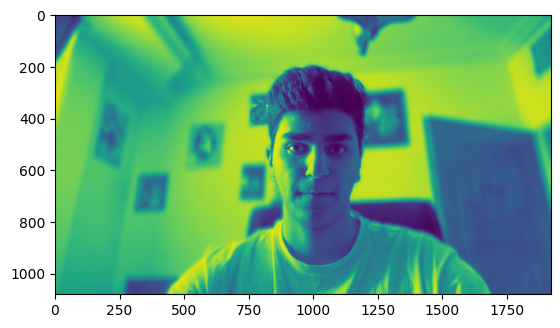

In [27]:
plt.close()
plt.imshow(img_gray)
plt.show()

In [28]:
x=face[0][0]
y=face[0][1]
x1=x+face[0][2]
y1=y+face[0][3]

In [29]:
xb=eye[0][0]
yb=eye[0][1]
x1b=xb+eye[0][2]
y1b=yb+eye[0][3]

In [30]:
xb1=eye[1][0]
yb1=eye[1][1]
x1b1=xb1+eye[1][2]
y1b1=yb1+eye[1][3]


In [31]:
img2=img.copy()
face_out=cv2.rectangle(img2,(x,y),(x1,y1),(255,0,255),3)
# eye_out=cv2.rectangle(img2,(xb,yb),(x1b,y1b),(255,0,0),3)
# eye_out=cv2.rectangle(img2,(xb1,yb1),(x1b1,y1b1),(0,0,255),3)

In [32]:
chr(1)

'\x01'

In [33]:
show(img2)

In [36]:
loop=True
while loop:
    _,img_cam=cam.read()
    gray=cv2.cvtColor(img_cam,cv2.COLOR_BGR2GRAY)
    face=face_model.detectMultiScale(gray)
    try:
        x=face[0][0]
        y=face[0][1]
        x1=x+face[0][2]
        y1=y+face[0][3]
    except IndexError:
        print('out of range')
    gray_eye=gray[y:y1,x:x1]
    eye=eye_model.detectMultiScale(gray_eye)
    imgout=img_cam.copy()

    out=cv2.rectangle(imgout,(x,y),(x1,y1),(155,155,0),4)
    for (xe,ye,h,w) in eye:
        cv2.rectangle(imgout,(xe+x,ye+y),(xe+h+x,ye+w+y),(255,0,0),3)
        
    cv2.imshow('amir',out)
    if cv2.waitKey(1)== ord('q'):
        loop=False
        cv2.destroyAllWindows()
        break
    


out of range
out of range
out of range
